# Practica 3

Importar librerías

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Importar archivo csv 'artículos'

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Programación/Deep_Learning/practica2_regresion_gradiente_descendente/articulos_ml.csv - articulos_ml.csv (1).csv')
df

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000
...,...,...,...,...,...,...,...,...
156,[Log] 83: How Google Uses Machine Learning And...,[Log] 83: http://feedproxy.google.com/~r/Techc...,3239,3,11.0,1,84,3239
157,[Log] 84: Zuck Knows If You've Been Bad Or Goo...,[Log] 84: http://feedproxy.google.com/~r/Techc...,2566,3,8.0,4,85,25019
158,[Log] 85: Microsoft Improves Windows Phone Voi...,[Log] 85: http://feedproxy.google.com/~r/Techc...,2089,4,4.0,1,86,49614
159,[Log] 86: How Google's Acquisition Of DNNresea...,[Log] 86: http://feedproxy.google.com/~r/Techc...,1530,4,12.0,3,87,33660


Quitaremos la columna 'url' pues no la usaremos

In [4]:
df_new = df.drop(['Title', 'url'], axis=1)
df_new

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,1888,1,2.0,2,34,200000
1,1742,9,NaN,9,5,25000
2,962,6,0.0,1,10,42000
3,1221,3,NaN,2,68,200000
4,2039,1,104.0,4,131,200000
...,...,...,...,...,...,...
156,3239,3,11.0,1,84,3239
157,2566,3,8.0,4,85,25019
158,2089,4,4.0,1,86,49614
159,1530,4,12.0,3,87,33660


Algunas filas de la columna 'comments', no tienen datos, por lo que se rellenarán con el número 0

In [5]:
df_new = df_new.fillna(0)
df_new

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,1888,1,2.0,2,34,200000
1,1742,9,0.0,9,5,25000
2,962,6,0.0,1,10,42000
3,1221,3,0.0,2,68,200000
4,2039,1,104.0,4,131,200000
...,...,...,...,...,...,...
156,3239,3,11.0,1,84,3239
157,2566,3,8.0,4,85,25019
158,2089,4,4.0,1,86,49614
159,1530,4,12.0,3,87,33660


Para comenzar a trabajar con los datos, se crearán las funciones necesarias para calcular el MSE, covarianza, gradiente descendente y graficar los resultados

In [6]:
# Covarianza
def covarianza(x,y):
  x_mean = np.mean(x)
  y_mean = np.mean(y)
  resta_x = x - x_mean
  resta_y = y - y_mean
  mult = resta_x * resta_y
  suma = sum(mult)
  return suma/len(x)

# Correlación de Pearson
def corr_Pearson(x,y):
  return covarianza(x,y)/math.sqrt(covarianza(x,x)*covarianza(y,y))

# Mapa de calor
def mapa_de_calor_correlacion(data):
    correlaciones = df[colnames].corr()
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlaciones, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=1, annot=True, cbar_kws={"shrink": .60})
    plt.show();

# Hipótesis
def hipotesis(x, theta0, theta1):
  return (x*theta1) + theta0

# MSE
def MSE(h, y):
  return sum((h-y)**2)/(2*len(h))

# Costo
def costo(x, y, theta0, theta1):
  h = hipotesis(x, theta0, theta1)
  mse = MSE(h, y)
  return h, mse

# Gráfica
def grafica(x, y, theta0, theta1):
  h, mse = costo(x, y, theta0, theta1)
  plt.plot(x, y, marker='.', linestyle='none')
  plt.plot(x, h)
  plt.show()
  return h, mse

# Gradiente Descendente
def grad_desc(x, y, theta0, theta1, alpha, epocas):
  for n in range(epocas):
    hip = theta1 * x + theta0
    theta_0 = (alpha/len(y)) * sum((hip - y))
    theta_0 = theta0 - theta_0
    theta_1 = sum(x * (hip - y))
    theta_1 = theta_1 * (alpha/len(y))
    theta_1 = theta1 - theta_1
    theta0 = theta_0
    theta1 = theta_1
  return theta_0, theta_1

Calculamos covarianza

In [7]:
colnames = ['Word count',	'# of Links',	'# of comments',	'# Images video',	'Elapsed days']

for col in colnames:
  print(covarianza(df_new[col], df_new['# Shares']))

6981978.853362141
587958.9975695381
142784.83796921413
9167.630029705639
1604699.6151768835


Calculamos la correlación de Pearson

In [8]:
for col in colnames:
  print(corr_Pearson(df_new[col],df_new['# Shares']))

0.14173566059432546
0.2883251710592019
0.2697613817050961
0.062170484439083656
0.32534262838636446


Hacemos la matriz de covarianza

In [9]:
todas_columnas = ['Word count',	'# of Links',	'# of comments',	'# Images video',	'Elapsed days', '# Shares']

matriz = [['__________'] + todas_columnas]

for fil in todas_columnas:
  fila = [fil]
  for col in colnames:
    fila.append(covarianza(df_new[fil],df_new[col]))
  matriz.append(fila)

for row in matriz:
  print(row)

['__________', 'Word count', '# of Links', '# of comments', '# Images video', 'Elapsed days', '# Shares']
['Word count', 1295880.6275992447, 18600.39103429653, 1524.3505266000539, 1799.0299756953825, -21715.578990008096]
['# of Links', 18600.39103429653, 2220.7269781258574, 67.00972184715084, 3.3861733729408607, 317.7529030515799]
['# of comments', 1524.3505266000539, 67.00972184715084, 149.6135179969909, -1.366613942363335, 52.43636433779561]
['# Images video', 1799.0299756953825, 3.3861733729408607, -1.366613942363335, 11.612129161683562, 81.55021025423396]
['Elapsed days', -21715.578990008096, 317.7529030515799, 52.43636433779561, 81.55021025423396, 12991.872767254354]
['# Shares', 6981978.853362141, 587958.9975695381, 142784.83796921413, 9167.630029705639, 1604699.6151768835]


Calculamos la tabla de correlación

In [10]:
print(df_new[todas_columnas].corr())

                Word count  # of Links  # of comments  # Images video  \
Word count        1.000000    0.346730       0.109475        0.463767   
# of Links        0.346730    1.000000       0.116253        0.021087   
# of comments     0.109475    0.116253       1.000000       -0.032787   
# Images video    0.463767    0.021087      -0.032787        1.000000   
Elapsed days     -0.167361    0.059157       0.037611        0.209958   
# Shares          0.141736    0.288325       0.269761        0.062170   

                Elapsed days  # Shares  
Word count         -0.167361  0.141736  
# of Links          0.059157  0.288325  
# of comments       0.037611  0.269761  
# Images video      0.209958  0.062170  
Elapsed days        1.000000  0.325343  
# Shares            0.325343  1.000000  


Creamos el mapa de calor

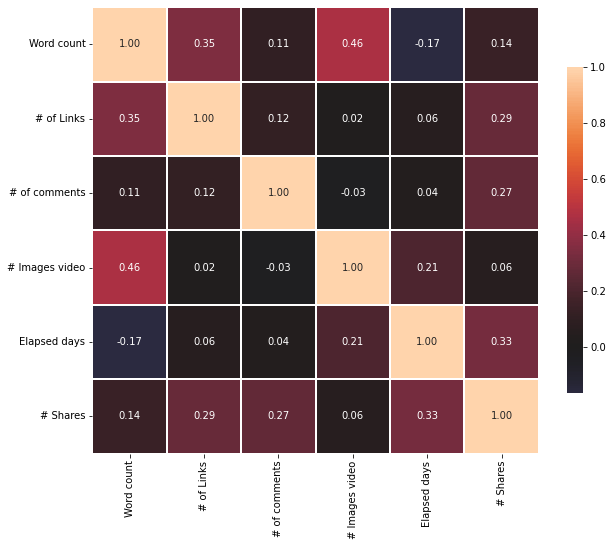

In [11]:
def mapa_de_calor_correlacion(data):
    correlaciones = df_new[todas_columnas].corr()
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlaciones, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=1, annot=True, cbar_kws={"shrink": .60})
    plt.show();

mapa_de_calor_correlacion(df_new)

Calculamos nuestra hipótesis manualmente para 'Word Count' y '# Shares' y graficamos

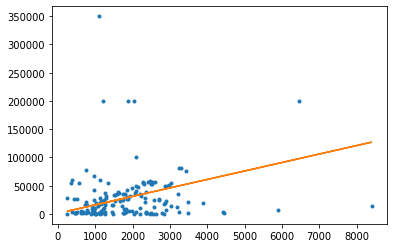

MSE =  977348104.447205
0      29320
1      27130
2      15430
3      19315
4      31585
       ...  
156    49585
157    39490
158    32335
159    23950
160    15295
Name: Word count, Length: 161, dtype: int64


In [12]:
theta0, theta1 = 1000, 15
x, y = df_new['Word count'], df_new['# Shares']
h, mse = grafica(x, y, theta0, theta1)
print('MSE = ', mse)
print(h)

Calculamos nuestra hipótesis manualmente para '# of Links' y '# Shares' y graficamos

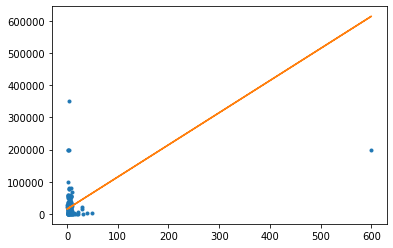

MSE =  1463829834.6956522


In [ ]:
theta0, theta1 = 15000, 1000
x, y = df_new['# of Links'], df_new['# Shares']
h, mse = grafica(x, y, theta0, theta1)
print('MSE = ', mse)

Calculamos nuestra hipótesis manualmente para '# of comments' y '# Shares' y graficamos

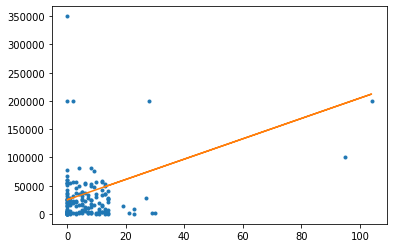

MSE =  968863880.658385


In [ ]:
theta0, theta1 = 25000, 1800
x, y = df_new['# of comments'], df_new['# Shares']
h, mse = grafica(x, y, theta0, theta1)
print('MSE = ', mse)

Calculamos nuestra hipótesis manualmente para '# Images video' y '# Shares' y graficamos

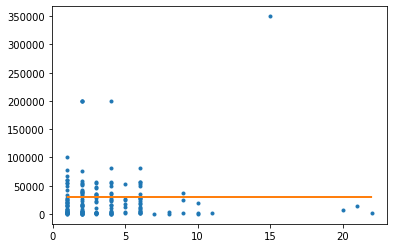

MSE =  938378819.5248448


In [ ]:
theta0, theta1 = 30000, 1
x, y = df_new['# Images video'], df_new['# Shares']
h, mse = grafica(x, y, theta0, theta1)
print('MSE = ', mse)

Calculamos nuestra hipótesis manualmente para 'Elapsed days' y '# Shares' y graficamos

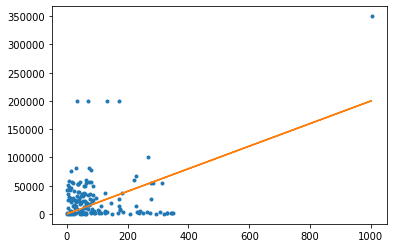

MSE =  909805366.3509316


In [ ]:
theta0, theta1 = 1, 200
x, y = df_new['Elapsed days'], df_new['# Shares']
h, mse = grafica(x, y, theta0, theta1)
print('MSE = ', mse)

## Calcular Thetas usando Gradiente Descendente

Calculamos el gradiente descendente para 'Word count' y '# Shares'.

Igualmente graficamos y calculamos el MSE

Theta 0 =  1.056263912883398 Theta 1 =  12.597876736650072
MSE =  909805366.3509316


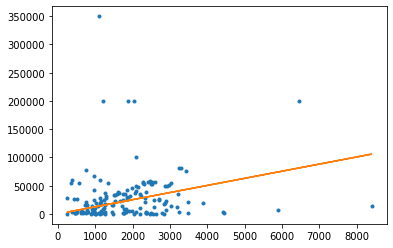

In [ ]:
# Gradiente Descendente
theta0, theta1 = 1, 1
x, y = df_new['Word count'], df_new['# Shares']
theta_0, theta_1 = grad_desc(x, y, theta0, theta1, 0.0000001, 100)
print('Theta 0 = ', theta_0, 'Theta 1 = ', theta_1)

# Gráfica y MSE
print('MSE = ', mse)
x, mse = grafica(x, y, theta_0, theta_1)

Calculamos el gradiente descendente para '# of Links' y '# Shares'.

Igualmente graficamos y calculamos el MSE

Theta 0 =  3.758271198183203 Theta 1 =  78.37304334862647
MSE =  964499206.3403523


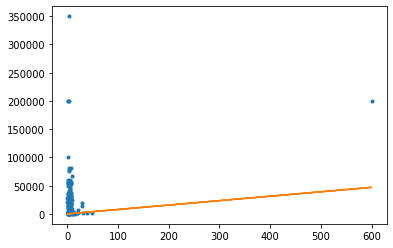

In [ ]:
# Gradiente Descendente
theta0, theta1 = 1, 1
x, y = df_new['# of Links'], df_new['# Shares']
theta_0, theta_1 = grad_desc(x, y, theta0, theta1, 0.00001, 10)
print('Theta 0 = ', theta_0, 'Theta 1 = ', theta_1)

# Gráfica y MSE
print('MSE = ', mse)
x, mse = grafica(x, y, theta_0, theta_1)

Calculamos el gradiente descendente para '# of comments' y '# Shares'.

Igualmente graficamos y calculamos el MSE

Theta 0 =  21220.807902470104 Theta 1 =  951.1462679248507
MSE =  1266427543.1155982


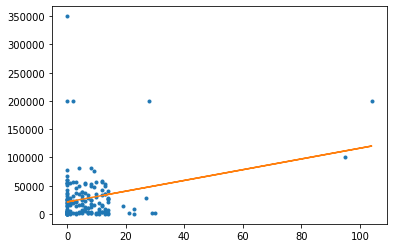

In [ ]:
# Gradiente Descendente
theta0, theta1 = 1, 1
x, y = df_new['# of comments'], df_new['# Shares']
theta_0, theta_1 = grad_desc(x, y, theta0, theta1, 0.01, 1000)
print('Theta 0 = ', theta_0, 'Theta 1 = ', theta_1)

# Gráfica y MSE
print('MSE = ', mse)
x, mse = grafica(x, y, theta_0, theta_1)

Calculamos el gradiente descendente para '# Images video' y '# Shares'.

Igualmente graficamos y calculamos el MSE

Theta 0 =  24790.035258140215 Theta 1 =  828.2692809772639
MSE =  868143240.2931695


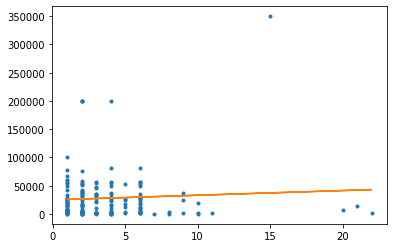

In [ ]:
# Gradiente Descendente
theta0, theta1 = 1, 1
x, y = df_new['# Images video'], df_new['# Shares']
theta_0, theta_1 = grad_desc(x, y, theta0, theta1, 0.01, 1000)
print('Theta 0 = ', theta_0, 'Theta 1 = ', theta_1)

# Gráfica y MSE
print('MSE = ', mse)
x, mse = grafica(x, y, theta_0, theta_1)

Calculamos el gradiente descendente para 'Elapsed days' y '# Shares'.

Igualmente graficamos y calculamos el MSE

Theta 0 =  10.916515294629189 Theta 1 =  192.13229144768107
MSE =  932672622.9084514


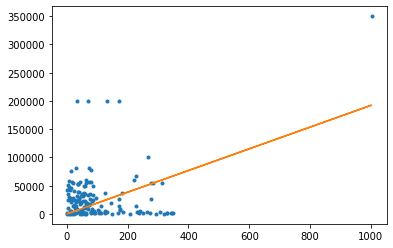

In [ ]:
# Gradiente Descendente
theta0, theta1 = 1, 1
x, y = df_new['Elapsed days'], df_new['# Shares']
theta_0, theta_1 = grad_desc(x, y, theta0, theta1, 0.000001, 1000)
print('Theta 0 = ', theta_0, 'Theta 1 = ', theta_1)

# Gráfica y MSE
print('MSE = ', mse)
x, mse = grafica(x, y, theta_0, theta_1)